In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt           

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train =pd.read_csv('D:\\CS50\\projects data set\\ANALYTICS VIDYA-customer segmentation\\train_1.csv')
df_test =pd.read_csv('D:\\CS50\\projects data set\\ANALYTICS VIDYA-customer segmentation\\test_1.csv')

print(df_train.shape, df_test.shape)

(8068, 11) (2627, 10)


In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


observation

* test data have 8067 rows & 10 columns (without segmentation data column)
* train data have 2627 rows & 11 columns

In [5]:
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
df_missing         = df_train.isnull().sum().sort_values(ascending=False).reset_index()
df_missing.columns = ['column_name','missing_values']
df_missing = df_missing.loc[df_missing['missing_values']>0].sort_values(ascending=False,by = 'missing_values')
df_missing


,column_name,missing_values
0,Work_Experience,829
1,Family_Size,335
2,Ever_Married,140
3,Profession,124
4,Graduated,78
5,Var_1,76


In [7]:
percentage         =(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)*100
percentage         =percentage.reset_index()
percentage.columns =['column_name','percent']

percentage         =percentage.loc[percentage['percent']>0].sort_values(ascending=False,by='percent')
percentage

,column_name,percent
0,Work_Experience,10.275161
1,Family_Size,4.152206
2,Ever_Married,1.735250
3,Profession,1.536936
4,Graduated,0.966782
5,Var_1,0.941993


In [8]:
df_missing= df_missing.merge(percentage)
df_missing

,column_name,missing_values,percent
0,Work_Experience,829,10.275161
1,Family_Size,335,4.152206
2,Ever_Married,140,1.735250
3,Profession,124,1.536936
4,Graduated,78,0.966782
5,Var_1,76,0.941993


<AxesSubplot:xlabel='missing_values', ylabel='column_name'>

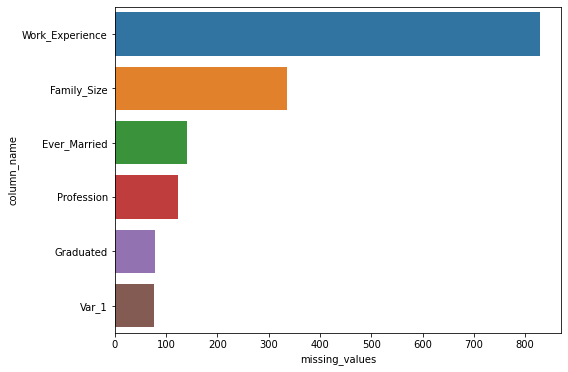

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(data =df_missing,x='missing_values',y='column_name')

# dealing with missing values

In [10]:
df_train.drop('ID',axis=1,inplace=True)
df_test.drop('ID',axis=1,inplace=True)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


In [12]:
'''
usual method

df_test['Work_Experience'] = df_test['Work_Experience'].fillna(df_test['Work_Experience'].median())
df_train['Work_Experience'] = df_train['Work_Experience'].fillna(df_train['Work_Experience'].median())

df_train['Family_Size'] = df_train['Family_Size'].fillna(df_train['Family_Size'].median())
df_test['Family_Size'] = df_test['Family_Size'].fillna(df_test['Family_Size'].median())
'''

"\nusual method\n\ndf_test['Work_Experience'] = df_test['Work_Experience'].fillna(df_test['Work_Experience'].median())\ndf_train['Work_Experience'] = df_train['Work_Experience'].fillna(df_train['Work_Experience'].median())\n\ndf_train['Family_Size'] = df_train['Family_Size'].fillna(df_train['Family_Size'].median())\ndf_test['Family_Size'] = df_test['Family_Size'].fillna(df_test['Family_Size'].median())\n"

In [13]:
# another method for reducing repeated process

def fill_missing_data(column):
    median=column.median()        
    column.fillna(value=median, inplace=True)
    
fill_missing_data(df_train.Work_Experience)
fill_missing_data(df_train.Family_Size)    
fill_missing_data(df_test.Work_Experience)
fill_missing_data(df_test.Family_Size)    
    

In [14]:
df_train.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [15]:
# df_train.isnull().sum()
df_test.isnull().sum()

Gender              0
Ever_Married       50
Age                 0
Graduated          24
Profession         38
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              32
dtype: int64

## dealing with categorical values

In [16]:
null_evrmarried = df_train[df_train['Ever_Married'].isnull()]
null_evrmarried.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
24,Female,NaN,58,No,Executive,1.0,Average,3.0,Cat_3,B
108,Female,NaN,19,No,Healthcare,6.0,Low,5.0,Cat_3,D
201,Male,NaN,19,No,Healthcare,9.0,Low,3.0,Cat_3,D
213,Female,NaN,85,No,Lawyer,0.0,High,1.0,Cat_3,C
272,Male,NaN,19,No,Entertainment,0.0,High,3.0,Cat_4,D


In [17]:
null_evrmarried_test = df_test[df_test['Ever_Married'].isnull()]
null_evrmarried_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
178,Female,NaN,56,Yes,Artist,1.0,Average,2.0,Cat_6
227,Female,NaN,56,Yes,Engineer,8.0,Average,3.0,Cat_6
240,Male,NaN,59,Yes,Artist,1.0,Average,2.0,Cat_6
248,Female,NaN,30,Yes,Doctor,0.0,Low,3.0,Cat_3
261,Male,NaN,71,No,Executive,1.0,High,1.0,NaN


In [18]:
# if family size is 1.0 then it is evermarried = NO
# if age is less than 40 then evermarried = yes

In [19]:
for i in range(len(null_evrmarried)):
    if null_evrmarried.iloc[i, 2]<=40:
        null_evrmarried.iloc[i, 1]='No'
    elif null_evrmarried.iloc[i, 7]==1.0:
        null_evrmarried.iloc[i, 1]='Yes'
    else:
        null_evrmarried.iloc[i, 1]='Yes'
        
null_evrmarried.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
24,Female,Yes,58,No,Executive,1.0,Average,3.0,Cat_3,B
108,Female,No,19,No,Healthcare,6.0,Low,5.0,Cat_3,D
201,Male,No,19,No,Healthcare,9.0,Low,3.0,Cat_3,D
213,Female,Yes,85,No,Lawyer,0.0,High,1.0,Cat_3,C
272,Male,No,19,No,Entertainment,0.0,High,3.0,Cat_4,D


In [20]:
for i in range(len(null_evrmarried_test)):
    if null_evrmarried_test.iloc[i, 2]<=40:
        null_evrmarried_test.iloc[i, 1]='No'
    elif null_evrmarried_test.iloc[i, 7]==1.0:
        null_evrmarried_test.iloc[i, 1]='Yes'
    else:
        null_evrmarried_test.iloc[i, 1]='Yes'
        
null_evrmarried_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
178,Female,Yes,56,Yes,Artist,1.0,Average,2.0,Cat_6
227,Female,Yes,56,Yes,Engineer,8.0,Average,3.0,Cat_6
240,Male,Yes,59,Yes,Artist,1.0,Average,2.0,Cat_6
248,Female,No,30,Yes,Doctor,0.0,Low,3.0,Cat_3
261,Male,Yes,71,No,Executive,1.0,High,1.0,NaN


In [21]:
df_train['Ever_Married'][df_train['Ever_Married'].isnull()]=null_evrmarried['Ever_Married']
df_train['Ever_Married'].isnull().sum()

0

In [22]:
df_test['Ever_Married'][df_test['Ever_Married'].isnull()]=null_evrmarried_test['Ever_Married']
df_test['Ever_Married'].isnull().sum()

0

#CATEGORICAL TO NUMERICAL THROUGH MAPPING


In [23]:
df_train['Ever_Married'] =df_train['Ever_Married'].map({'Yes' : 1,'No': 0})
df_test['Ever_Married'] =df_test['Ever_Married'].map({'Yes' : 1,'No': 0})

In [24]:
# df_test['Ever_Married'].unique()
df_train['Ever_Married'].unique()

array([0, 1], dtype=int64)

In [25]:
df_train.isnull().sum()

Gender               0
Ever_Married         0
Age                  0
Graduated           78
Profession         124
Work_Experience      0
Spending_Score       0
Family_Size          0
Var_1               76
Segmentation         0
dtype: int64

GRADUATED COLUMN

In [26]:
df_train['Graduated'].unique()

array(['No', 'Yes', nan], dtype=object)

In [27]:
df_train[df_train['Graduated'].isnull()].head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
57,Male,0,32,NaN,Doctor,8.0,Low,2.0,Cat_6,D
220,Female,0,35,NaN,Artist,0.0,Low,3.0,Cat_6,B
290,Female,0,43,NaN,Entertainment,1.0,Low,1.0,Cat_6,B
431,Male,0,18,NaN,Executive,1.0,Low,5.0,Cat_4,A
510,Male,0,51,NaN,Artist,6.0,Low,4.0,Cat_4,B


In [28]:
# df_test[df_test['Graduated'].isnull()].head()

In [29]:
df_train['Graduated'] = df_train['Graduated'].apply(lambda x:1 if x=='Yes' else 0)
df_train['Graduated']

0       0
1       1
2       1
3       1
4       1
       ..
8063    0
8064    0
8065    1
8066    1
8067    1
Name: Graduated, Length: 8068, dtype: int64

In [30]:
df_test['Graduated'] = df_test['Graduated'].apply(lambda x:1 if x=='Yes' else 0)
df_test['Graduated']

0       1
1       1
2       0
3       0
4       0
       ..
2622    0
2623    1
2624    1
2625    1
2626    1
Name: Graduated, Length: 2627, dtype: int64

In [31]:
df_train['Graduated'].unique()

array([0, 1], dtype=int64)

In [32]:
df_train['Graduated'].isnull().sum()

0

In [33]:
df_test['Graduated'].isnull().sum()

0

#PROFESSION COLUMN

In [34]:
df_train['Profession'].isnull().sum()

124

In [35]:
df_train['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [36]:
null_profession = df_train[df_train['Profession'].isnull()]
null_profession.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
79,Female,0,49,1,NaN,1.0,Low,1.0,Cat_6,D
118,Male,0,27,0,NaN,2.0,Low,7.0,Cat_4,D
219,Male,0,62,1,NaN,0.0,Low,1.0,Cat_6,A
237,Female,0,33,1,NaN,0.0,Low,4.0,NaN,D
437,Male,1,79,0,NaN,0.0,Average,2.0,NaN,C


In [37]:
null_profession_test = df_test[df_test['Profession'].isnull()]
null_profession_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
2,Female,1,69,0,NaN,0.0,Low,1.0,Cat_6
138,Male,1,61,1,NaN,1.0,Average,3.0,Cat_6
179,Male,1,63,0,NaN,1.0,Average,4.0,Cat_6
193,Female,0,35,0,NaN,1.0,Low,2.0,Cat_7
264,Female,0,26,0,NaN,1.0,Low,1.0,Cat_7


In [38]:
# if no graduation let us considr as 'unemployed'
# if graduated let us consider as 'other'

In [39]:
for i in range(len(null_profession)):
    if null_profession.iloc[i, 5]==0:
        null_profession.iloc[i, 4]='Unemployed'
    else:
        null_profession.iloc[i, 4]='Other'
    
null_profession.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
79,Female,0,49,1,Other,1.0,Low,1.0,Cat_6,D
118,Male,0,27,0,Other,2.0,Low,7.0,Cat_4,D
219,Male,0,62,1,Unemployed,0.0,Low,1.0,Cat_6,A
237,Female,0,33,1,Unemployed,0.0,Low,4.0,NaN,D
437,Male,1,79,0,Unemployed,0.0,Average,2.0,NaN,C
440,Female,0,18,0,Unemployed,0.0,Low,6.0,Cat_6,D
498,Male,0,22,0,Other,1.0,Low,6.0,Cat_1,D
545,Female,0,32,0,Other,10.0,Low,5.0,Cat_6,C
601,Male,0,18,0,Other,6.0,High,4.0,Cat_3,D
641,Male,1,62,0,Other,7.0,High,2.0,Cat_6,D


In [40]:
for i in range(len(null_profession_test)):
    if null_profession_test.iloc[i, 5]==0:
        null_profession_test.iloc[i, 4]='Unemployed'
    else:
        null_profession_test.iloc[i, 4]='Other'
    
null_profession_test.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
2,Female,1,69,0,Unemployed,0.0,Low,1.0,Cat_6
138,Male,1,61,1,Other,1.0,Average,3.0,Cat_6
179,Male,1,63,0,Other,1.0,Average,4.0,Cat_6
193,Female,0,35,0,Other,1.0,Low,2.0,Cat_7
264,Female,0,26,0,Other,1.0,Low,1.0,Cat_7
313,Male,1,41,1,Other,2.0,Low,1.0,Cat_6
334,Male,0,49,1,Other,1.0,Low,1.0,Cat_3
344,Female,1,42,1,Other,1.0,Low,2.0,Cat_6
357,Male,1,61,0,Other,1.0,Low,5.0,Cat_4
373,Male,1,35,1,Other,1.0,Low,2.0,Cat_7


In [41]:
df_train[df_train['Profession'].isnull()]=null_profession
df_train['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'Other',
       'Unemployed'], dtype=object)

In [42]:
df_test[df_test['Profession'].isnull()]=null_profession_test
df_test['Profession'].unique()

array(['Engineer', 'Healthcare', 'Unemployed', 'Executive', 'Marketing',
       'Doctor', 'Artist', 'Lawyer', 'Entertainment', 'Homemaker',
       'Other'], dtype=object)

In [43]:
df_train.isnull().sum()

Gender              0
Ever_Married        0
Age                 0
Graduated           0
Profession          0
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              76
Segmentation        0
dtype: int64

In [44]:
df_test.isnull().sum()

Gender              0
Ever_Married        0
Age                 0
Graduated           0
Profession          0
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              32
dtype: int64

In [45]:
df_train['Gender'] = df_train['Gender'].map({'Male': 0,'Female': 1})
df_train.head(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D
1,1,1,38,1,Engineer,1.0,Average,3.0,Cat_4,A
2,1,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B


In [46]:
df_test['Gender'] = df_test['Gender'].map({'Male': 0,'Female': 1})
df_test.head(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,1,36,1,Engineer,0.0,Low,1.0,Cat_6
1,0,1,37,1,Healthcare,8.0,Average,4.0,Cat_6
2,1,1,69,0,Unemployed,0.0,Low,1.0,Cat_6


In [47]:
#df_train.Profession.unique()
#df_train.Spending_Score.unique()
df_train.Var_1.unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [48]:
Profession          = pd.get_dummies(df_train['Profession'])
Profession_test     = pd.get_dummies(df_test['Profession'])

Spending_Score      = pd.get_dummies(df_train['Spending_Score'],drop_first=True)
Spending_Score_test = pd.get_dummies(df_test['Spending_Score'],drop_first=True)

Var_1               = pd.get_dummies(df_train['Var_1'],drop_first=True)
Var_1_test          =pd.get_dummies(df_test['Var_1'],drop_first=True)

In [49]:
df_train = pd.concat([df_train,Profession,Spending_Score,Var_1],axis=1)  

df_train.drop(['Profession','Spending_Score','Var_1'],axis=1,inplace=True)
df_train.head(4)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Artist,Doctor,Engineer,...,Other,Unemployed,High,Low,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,0,0,22,0,1.0,4.0,D,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,1,38,1,1.0,3.0,A,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,1,67,1,1.0,1.0,B,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,1,67,1,0.0,2.0,B,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [50]:
df_test=pd.concat([df_test,Profession_test,Spending_Score_test,Var_1_test],axis=1)

df_test.drop(['Profession','Spending_Score','Var_1'],axis=1,inplace=True)
df_test.head(4)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Artist,Doctor,Engineer,Entertainment,...,Other,Unemployed,High,Low,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,1,1,36,1,0.0,1.0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,37,1,8.0,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,69,0,0.0,1.0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,0,1,59,0,11.0,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


<AxesSubplot:>

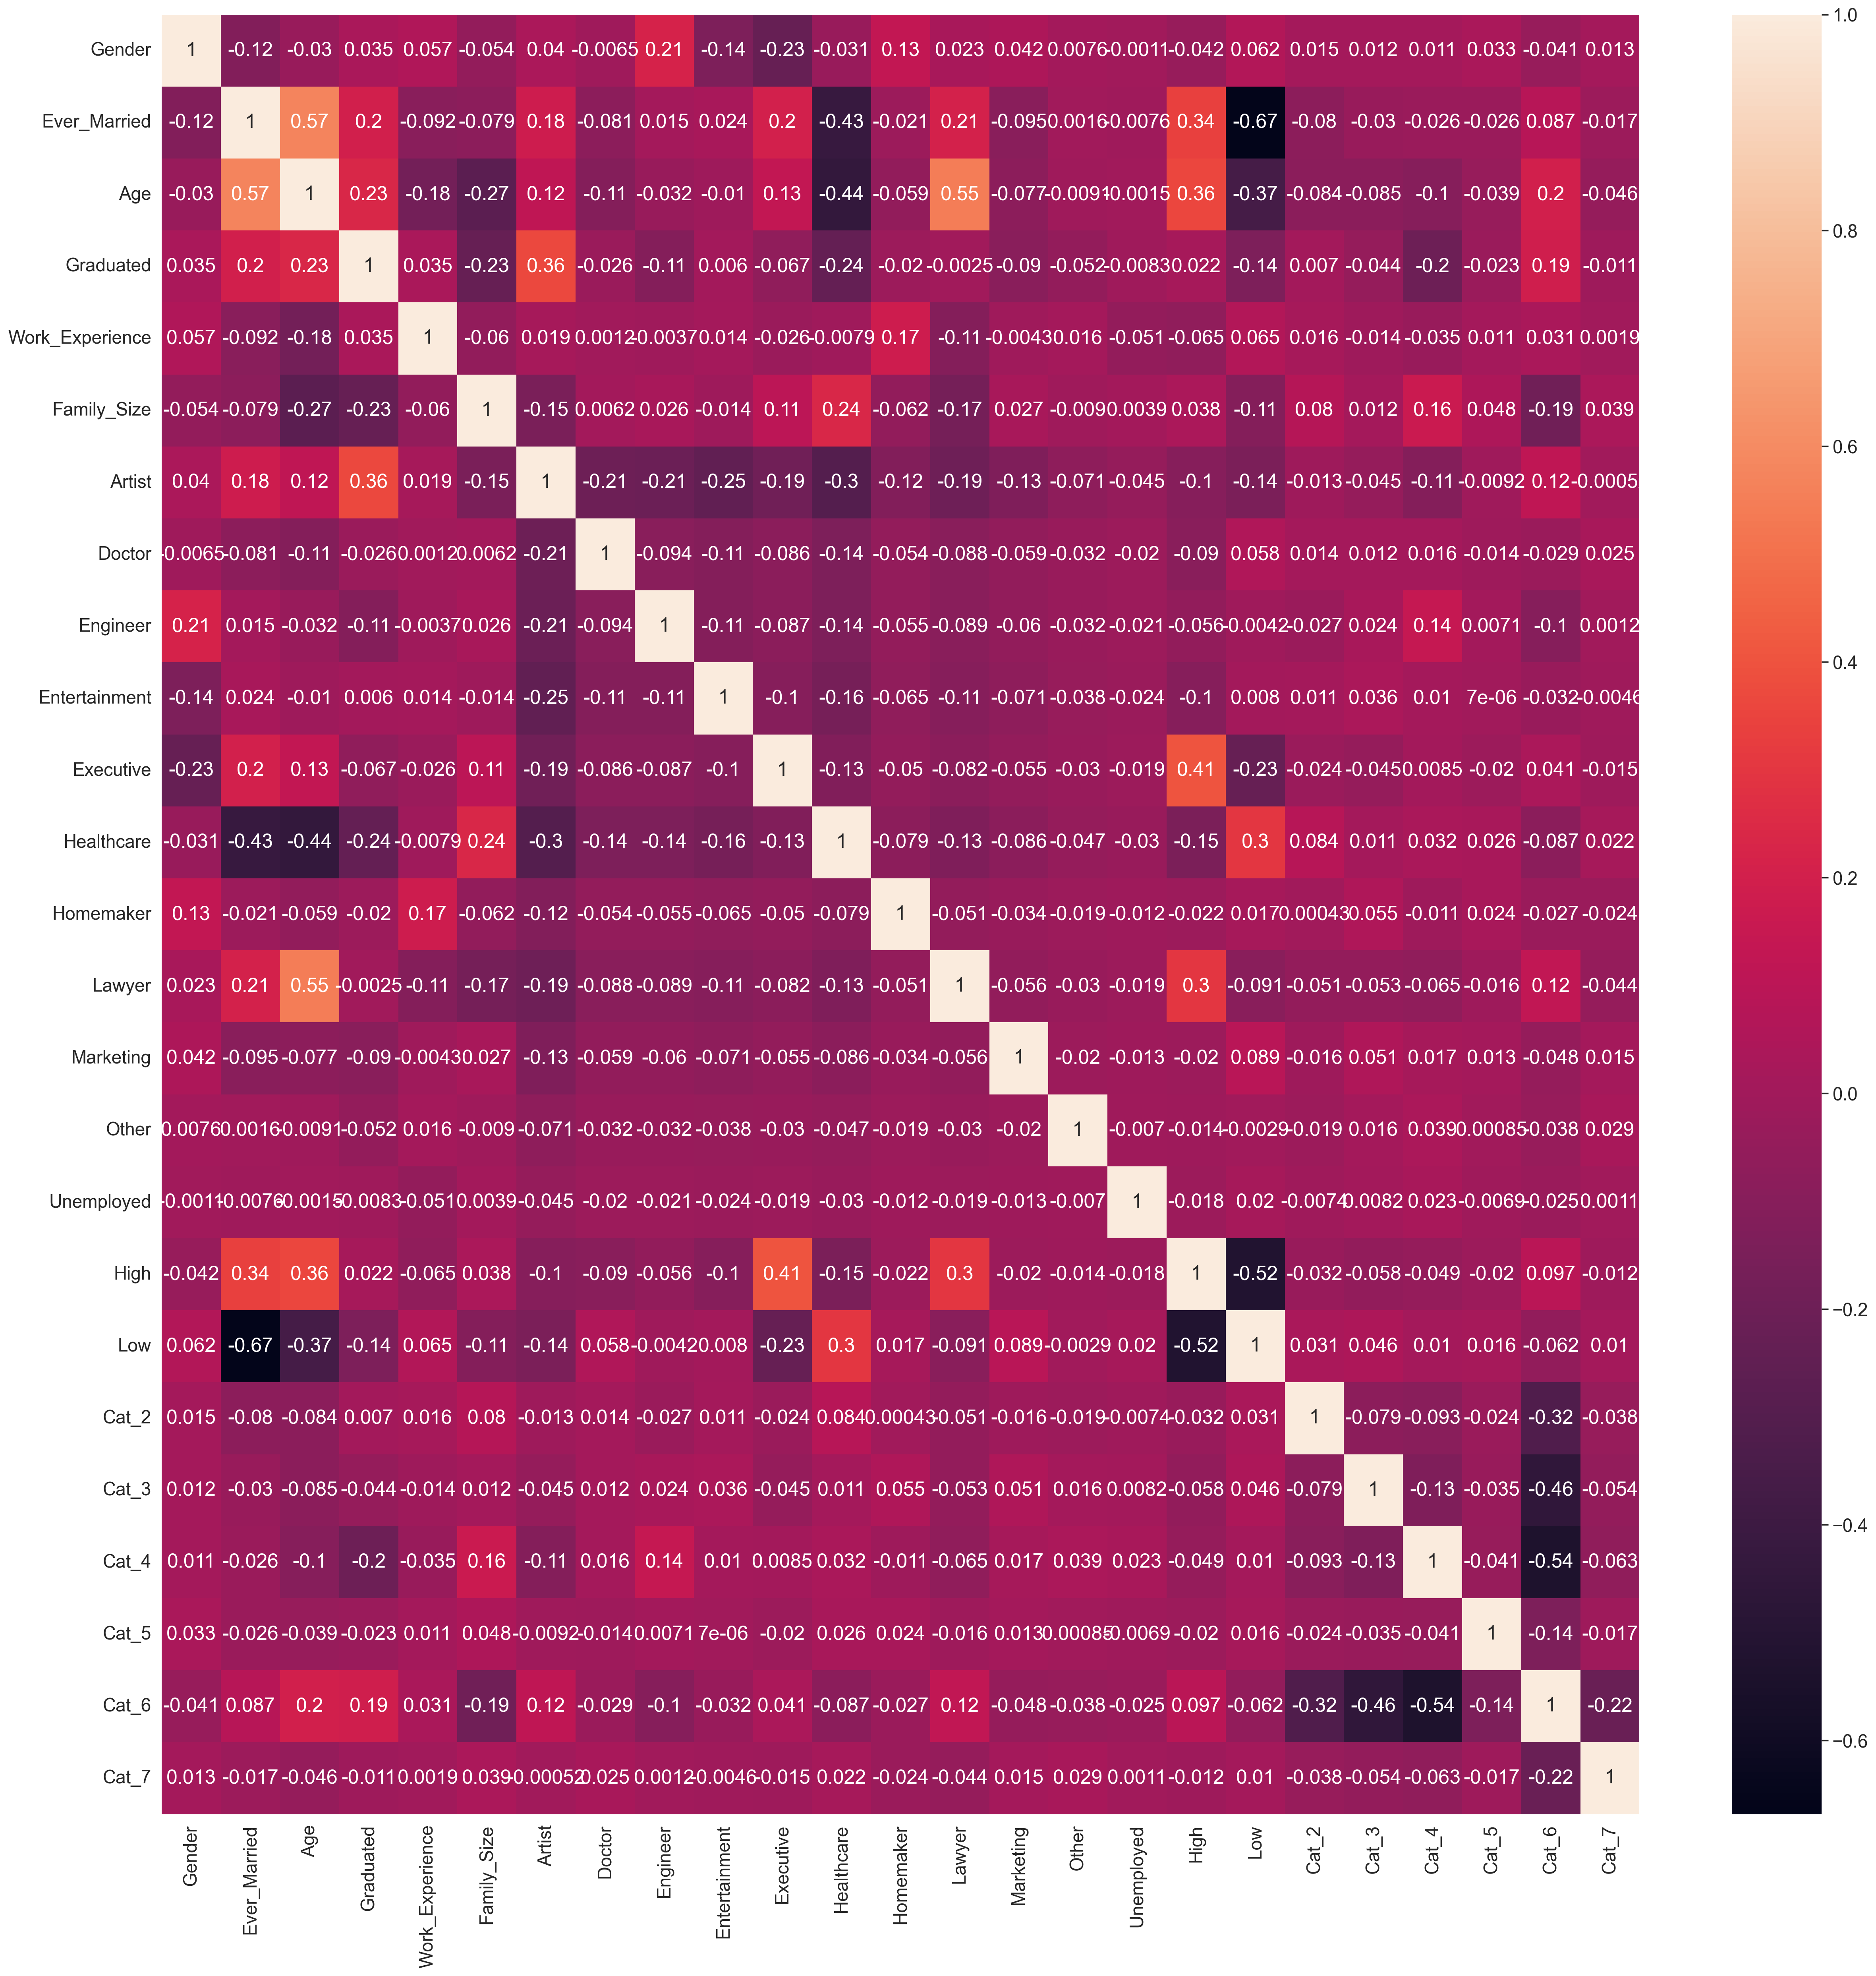

In [51]:
plt.figure(figsize=(30,30),dpi=200)

correlation = df_train.corr()
sns.set(font_scale =1.5)
sns.heatmap(correlation,annot=True)

## Training and validating

In [52]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [103]:
'''

y_train_val =y_train
y_test_val  =y_test

model =RandomForestClassifier()
model.fit(X_train,y_train_val)

y_predicted = model.predict(X_test)
y_predicted

accuracy = confusion_matrix(y_test_val,y_predicted)
accuracy

acc_score =accuracy_score(y_test_val,y_predicted)
acc_score
'''

"\nX_train,X_test,y_train,y_test=train_test_split(df_train.drop('Segmentation',axis=1),\n                                               df_train['Segmentation'],test_size =0.30,\n                                               random_state =101)\ny_train_val =y_train\ny_test_val  =y_test\n\nmodel =RandomForestClassifier()\nmodel.fit(X_train,y_train_val)\n\ny_predicted = model.predict(X_test)\ny_predicted\n\naccuracy = confusion_matrix(y_test_val,y_predicted)\naccuracy\n\nacc_score =accuracy_score(y_test_val,y_predicted)\nacc_score\n"

In [113]:
X =df_train.drop('Segmentation',axis=1)
y =df_train['Segmentation']

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.30,random_state =101)

In [138]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5647, 25)
(2421, 25)
(5647,)
(2421,)


In [139]:
def evaluate(model):
    model.fit(x_train,y_train)
    accuracy=model.score(xtest,ytest)
    
    print('model name ',model)
    print('accuracy ',accuracy)
    

In [143]:
dt  =DecisionTreeClassifier(max_depth=6)
rf  =RandomForestClassifier(max_samples=0.9)
knn =KNeighborsClassifier(n_neighbors=5)
lr  =LogisticRegression()
svm =SVC()

algorithm=[dt,rf,knn,lr,svm]

for x in model:
    evaluate(algorithm)

AttributeError: 'list' object has no attribute 'fit'